In [4]:
import numpy as np
import pandas as pd

from IPython.display import Markdown as md

In [12]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
# for offline ploting
import plotly.io as pio
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
# import plotly

# from plotly.graph_objs import Scatter, Layout

# print(plotly.__version__)

# plotly.offline.plot({

#     "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],

#     "layout": Layout(title="hello world")

# })
# plotly 작동 확인

In [70]:
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

![](./1.jpg)

# EDA(Exploratory Data Analysis) pipeine
#### 목적
#### 변수 간 트렌드, 패턴, 관계 등을 찾기
#### 데이터 분석 프로젝트 초기에 가설을 수립하기 위해 사용
#### 데이터 분석 프로젝트 초기에 적절한 모델 및 기법의 선정

In [6]:
patient_df = pd.read_csv('final_dataset_2.8.csv', encoding='cp949')
patient_df

,date,region,patient_id,global_num,sex,birth_year,age,country,province,disease,...,max_wind_speed_hhmi,ave_wind_speed_m.s,max_wind_direction_deg,Num_Covid,SO2max,COmax,O3max,NO2max,PM10max,PM25max
0,2020-01-20,서울_강서구,1000000001,2.0,male,1964.0,50s,Korea,Seoul,NaN,...,1451,1.8,0.0,0,0.014,1.2,0.049,0.059,88,49
1,2020-01-21,서울_중랑구,1000000002,5.0,male,1987.0,30s,Korea,Seoul,NaN,...,1836,1.6,340.3,1,0.003,0.7,0.026,0.044,27,10
2,2020-01-22,서울_종로구,1000000003,6.0,male,1964.0,50s,Korea,Seoul,NaN,...,1357,0.5,354.4,0,0.003,0.8,0.037,0.040,26,13
3,2020-01-23,서울_마포구,1000000004,7.0,male,1991.0,20s,Korea,Seoul,NaN,...,1708,2.0,320.6,1,0.004,0.5,0.028,0.059,35,21
4,2020-01-24,서울_성북구,1000000005,9.0,female,1992.0,20s,Korea,Seoul,NaN,...,1520,1.4,225.0,0,0.003,1.1,0.027,0.053,67,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,NaN,제주_제주시,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,NaN,...,527,3.1,326.3,0,0.002,0.5,0.045,0.039,55,21
3384,NaN,제주_제주시,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,NaN,...,1001,1.9,298.1,2,0.003,0.6,0.066,0.032,80,39
3385,NaN,제주_제주시,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,NaN,...,1001,1.9,298.1,2,0.003,0.6,0.066,0.032,80,39
3386,NaN,제주_제주시,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,NaN,...,1001,1.9,298.1,2,0.003,0.6,0.066,0.032,80,39


In [5]:
patient_df.shape

(3388, 41)

In [6]:
patient_df.head(5)

,date,region,patient_id,global_num,sex,birth_year,age,country,province,disease,...,max_wind_speed_hhmi,ave_wind_speed_m.s,max_wind_direction_deg,Num_Covid,SO2max,COmax,O3max,NO2max,PM10max,PM25max
0,2020-01-23,서울_강서구,1000000001,2.0,male,1964.0,50s,Korea,Seoul,NaN,...,1451,1.8,0.0,0,0.014,1.2,0.049,0.059,88,49
1,2020-01-30,서울_중랑구,1000000002,5.0,male,1987.0,30s,Korea,Seoul,NaN,...,1836,1.6,340.3,1,0.003,0.7,0.026,0.044,27,10
2,2020-01-30,서울_종로구,1000000003,6.0,male,1964.0,50s,Korea,Seoul,NaN,...,1357,0.5,354.4,0,0.003,0.8,0.037,0.040,26,13
3,2020-01-30,서울_마포구,1000000004,7.0,male,1991.0,20s,Korea,Seoul,NaN,...,1708,2.0,320.6,1,0.004,0.5,0.028,0.059,35,21
4,2020-01-31,서울_성북구,1000000005,9.0,female,1992.0,20s,Korea,Seoul,NaN,...,1520,1.4,225.0,0,0.003,1.1,0.027,0.053,67,40


In [7]:
patient_df.tail(5)

,date,region,patient_id,global_num,sex,birth_year,age,country,province,disease,...,max_wind_speed_hhmi,ave_wind_speed_m.s,max_wind_direction_deg,Num_Covid,SO2max,COmax,O3max,NO2max,PM10max,PM25max
3383,2020-03-29,제주_제주시,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,NaN,...,527,3.1,326.3,0,0.002,0.5,0.045,0.039,55,21
3384,2020-04-03,제주_제주시,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,NaN,...,1001,1.9,298.1,2,0.003,0.6,0.066,0.032,80,39
3385,2020-04-03,제주_제주시,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,NaN,...,1001,1.9,298.1,2,0.003,0.6,0.066,0.032,80,39
3386,2020-04-03,제주_제주시,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,NaN,...,1001,1.9,298.1,2,0.003,0.6,0.066,0.032,80,39
3387,2020-04-14,제주_제주시,7000000013,NaN,female,NaN,10s,China,Jeju-do,NaN,...,1110,3.2,321.5,0,0.002,0.4,0.057,0.035,42,22


In [8]:
patient_df['sex'][500] 
#데이터 프레임이 잘불려왔는지 확인하기 위해서 랜덤하게 sex컬럼에 555번째 값 추출

'male'

In [9]:
# for column in patient_df:
#     print(column)
# 컬럼 이름만 뽑기

In [10]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    3385 non-null   object 
 1   region                  3388 non-null   object 
 2   patient_id              3388 non-null   int64  
 3   global_num              2276 non-null   float64
 4   sex                     3311 non-null   object 
 5   birth_year              2927 non-null   float64
 6   age                     3304 non-null   object 
 7   country                 3388 non-null   object 
 8   province                3388 non-null   object 
 9   disease                 18 non-null     object 
 10  infection_case          2620 non-null   object 
 11  infection_order         31 non-null     float64
 12  infected_by             822 non-null    float64
 13  contact_number          643 non-null    float64
 14  symptom_onset_date      481 non-null    

# Describe the Data

### 변수 설명
#### confirmed_date : 코로나19 확진날짜
#### region : 확진 지역
#### patient_id : 환자 고유번호
#### global_num : 국제 감염수
#### sex : 성별
#### birth_year : 츨생년도
#### age : 나이
#### country : 국적
#### disease : 질별 유무
#### infection_case : 감염 경로
#### infection_order : 감염 순서
#### infected_by : 감염 경로
#### contact_number : 접촉 횟수
#### symptom_onset_date : 증상발병 날짜
#### released_date : 격리해제 날짜
#### deceased_date : 사망 날짜
#### state : 상태 (released, isolated, deceased)
#### sunshine_hr : 가조시간.hr
#### total_suntime_hr : 합계.일조시간.hr
#### sun_time_hhmi : 시간.최다일사.시각.hhmi
#### sun_amount_MJ_m2 : 시간.최다일사량.MJ.m2
#### total_sun_amount_MJ_m2 : 합계.일사량.MJ.m2
#### ave_tem : 평균기온.C
#### mini_tem : 최저기온.C
#### mini_tem_hhmi : 최저기온.시각.hhmi
#### max_tem : 최고기온.C.
#### max_tem_hhmi : 최고기온.시각.hhmi.
#### day_prec_mm : 일강수량.mm.
#### max_wind_speed_m.s : 최대.순간.풍속.m.s.
#### max_wind_speed_hhmi : 최대.순간풍속.시각.hhmi.
#### ave_wind_speed_m.s : 평균.풍속.m.s.
#### max_wind_direction_deg : 최대.순간.풍속.풍향.deg.
#### Num_Covid : 일별 확진자 수
#### Area_code : 지역 코드
#### SO2max : 아황산가스 (ppm)
#### COmax : 일산화탄소 (ppm)
#### O3max : 오존 (ppm)
#### NO2max : 이산화질소 (ppm)
#### PM10max : PM10 (㎍/㎥)
#### PM25max : PM2.5 (㎍/㎥)

In [11]:
patient_df.describe().round(2)

,patient_id,global_num,birth_year,infection_order,infected_by,contact_number,confirmed_date,sunshine_hr,total_suntime_hr,sun_time_hhmi,...,max_wind_speed_hhmi,ave_wind_speed_m.s,max_wind_direction_deg,Num_Covid,SO2max,COmax,O3max,NO2max,PM10max,PM25max
count,3.388000e+03,2276.00,2927.00,31.00,8.220000e+02,643.00,3385.00,3388.00,3388.00,3388.00,...,3388.00,3388.00,3388.00,3388.00,3388.00,3388.00,3388.00,3388.00,3388.00,3388.00
mean,3.498439e+09,6737.09,1975.07,2.39,2.667213e+09,18.13,20200303.44,11.86,6.91,1203.48,...,1330.73,1.86,226.95,7.32,0.01,0.62,0.05,0.03,64.44,37.00
std,2.201996e+09,3333.14,20.28,1.45,1.741377e+09,73.73,59.48,0.61,4.19,116.16,...,516.31,1.01,97.40,16.88,0.01,0.21,0.01,0.02,29.23,15.79
min,1.000000e+09,1.00,1916.00,1.00,1.000000e+09,0.00,20200120.00,10.10,0.00,700.00,...,0.00,0.40,0.00,0.00,0.00,0.10,0.01,0.00,12.00,6.00
25%,1.300000e+09,4270.00,1961.00,1.00,1.200000e+09,2.00,20200229.00,11.40,2.80,1200.00,...,1215.00,1.10,165.90,0.00,0.00,0.50,0.04,0.02,45.00,25.00
50%,2.000001e+09,7933.00,1975.00,2.00,2.000000e+09,4.00,20200308.00,11.70,8.80,1200.00,...,1417.00,1.70,258.80,1.00,0.00,0.60,0.05,0.03,58.00,36.00
75%,6.001001e+09,9516.75,1993.00,3.00,4.100000e+09,13.00,20200326.00,12.40,10.50,1200.00,...,1627.00,2.30,304.60,4.00,0.00,0.70,0.05,0.04,79.00,46.00
max,7.000000e+09,10758.00,2020.00,6.00,7.000000e+09,1160.00,20200429.00,13.70,12.50,1700.00,...,2359.00,13.30,357.50,92.00,0.14,3.70,0.11,0.10,293.00,134.00


In [12]:
patient_df.describe(include='object').round(2)

,date,region,sex,age,country,province,disease,infection_case,symptom_onset_date,released_date,deceased_date,state
count,3385,3388,3311,3304,3388,3388,18,2620,481,1327,62,3388
unique,87,132,2,11,12,17,1,23,73,76,35,3
top,2020-03-05,경북_경산시,female,20s,Korea,Gyeongsangbuk-do,True,contact with patient,2020-02-27,2020-03-20,2020-03-04,released
freq,145,632,1856,802,3361,1230,18,968,29,71,4,1886


# Gather Data by Type
###### 독립변수의 종류에는 범주형과 숫자형 두 가지.
###### 예측하고자하는 것이 사망률 ->숫자형이므로 범주형 변수와 사망률의 관계, 숫자형 변수와 사망률의 관계
###### 전자는 boxplot이 유용할 것 같고, 후자는 scatter plot이 유용함

In [14]:
numeric_feature = patient_df.columns[(patient_df.dtypes==int) | (patient_df.dtypes== float)]
categorical_feature = patient_df.columns[patient_df.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['global_num', 'birth_year', 'infection_order', 'infected_by', 'contact_number', 'sunshine_hr', 'total_suntime_hr', 'sun_amount_MJ_m2', 'total_sun_amount_MJ_m2', 'ave_tem', 'mini_tem', 'max_tem', 'day_prec_mm', 'max_wind_speed_m.s', 'ave_wind_speed_m.s', 'max_wind_direction_deg', 'SO2max', 'COmax', 'O3max', 'NO2max']
카테고리형 데이터는 다음과 같습니다. 
 ['date', 'region', 'sex', 'age', 'country', 'province', 'disease', 'infection_case', 'symptom_onset_date', 'confirmed_date', 'released_date', 'deceased_date', 'state']


In [14]:
# global_num', 'birth_year', 'infection_order', 'infected_by', 'contact_number' 은 수치형이 아님

In [15]:
numeric_feature = patient_df.select_dtypes(include=['int64'])
numeric_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   patient_id           3388 non-null   int64
 1   sun_time_hhmi        3388 non-null   int64
 2   mini_tem_hhmi        3388 non-null   int64
 3   max_tem_hhmi         3388 non-null   int64
 4   max_wind_speed_hhmi  3388 non-null   int64
 5   Num_Covid            3388 non-null   int64
 6   PM10max              3388 non-null   int64
 7   PM25max              3388 non-null   int64
dtypes: int64(8)
memory usage: 211.9 KB


In [16]:
categorical_feature = patient_df.select_dtypes(include=['object'])
categorical_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                3385 non-null   object
 1   region              3388 non-null   object
 2   sex                 3311 non-null   object
 3   age                 3304 non-null   object
 4   country             3388 non-null   object
 5   province            3388 non-null   object
 6   disease             18 non-null     object
 7   infection_case      2620 non-null   object
 8   symptom_onset_date  481 non-null    object
 9   released_date       1327 non-null   object
 10  deceased_date       62 non-null     object
 11  state               3388 non-null   object
dtypes: object(12)
memory usage: 317.8+ KB


# Show Categorical Counts

In [17]:
for colname in categorical_feature.columns:
    print (colname)
    print (categorical_feature[colname].value_counts(), '\n')

date
2020-03-05    145
2020-02-28    137
2020-03-01    133
2020-02-26    122
2020-03-04    116
             ... 
2020-02-07      1
2020-02-03      1
2020-02-10      1
2020-01-23      1
2020-01-27      1
Name: date, Length: 87, dtype: int64 

region
경북_경산시    632
경기_성남시    125
충남_천안시    107
경기_시흥시     94
경기_화성시     75
         ... 
경기_가평군      1
강원_태백시      1
강원_인제군      1
경남_함양군      1
전북_장수군      1
Name: region, Length: 132, dtype: int64 

sex
female    1856
male      1455
Name: sex, dtype: int64 

age
20s     802
50s     597
40s     455
30s     438
60s     401
70s     204
80s     156
10s     150
0s       55
90s      45
100s      1
Name: age, dtype: int64 

country
Korea            3361
China              11
United States       6
Thailand            2
Spain               1
France              1
Indonesia           1
Canada              1
Mongolia            1
Vietnam             1
Switzerland         1
Germany             1
Name: country, dtype: int64 

province
Gyeongsangbuk-do     1

# Check Missing Values

In [18]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(patient_df)

결측치가 있는 컬럼은: date입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: global_num입니다
해당 컬럼에 총 1112개의 결측치가 존재합니다.
결측치가 있는 컬럼은: sex입니다
해당 컬럼에 총 77개의 결측치가 존재합니다.
결측치가 있는 컬럼은: birth_year입니다
해당 컬럼에 총 461개의 결측치가 존재합니다.
결측치가 있는 컬럼은: age입니다
해당 컬럼에 총 84개의 결측치가 존재합니다.
결측치가 있는 컬럼은: disease입니다
해당 컬럼에 총 3370개의 결측치가 존재합니다.
결측치가 있는 컬럼은: infection_case입니다
해당 컬럼에 총 768개의 결측치가 존재합니다.
결측치가 있는 컬럼은: infection_order입니다
해당 컬럼에 총 3357개의 결측치가 존재합니다.
결측치가 있는 컬럼은: infected_by입니다
해당 컬럼에 총 2566개의 결측치가 존재합니다.
결측치가 있는 컬럼은: contact_number입니다
해당 컬럼에 총 2745개의 결측치가 존재합니다.
결측치가 있는 컬럼은: symptom_onset_date입니다
해당 컬럼에 총 2907개의 결측치가 존재합니다.
결측치가 있는 컬럼은: confirmed_date입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: released_date입니다
해당 컬럼에 총 2061개의 결측치가 존재합니다.
결측치가 있는 컬럼은: deceased_date입니다
해당 컬럼에 총 3326개의 결측치가 존재합니다.


In [37]:
for col in patient_df.columns:
    msg = 'column: {:>20}\t NaN 값 퍼센트 : {:.2f}%'.format(col, 100 * (patient_df[col].isnull().sum() / patient_df[col].shape[0]))
    print(msg)

column:                 date	 NaN 값 퍼센트 : 96.99%
column:               region	 NaN 값 퍼센트 : 0.00%
column:           patient_id	 NaN 값 퍼센트 : 0.00%
column:           global_num	 NaN 값 퍼센트 : 32.82%
column:                  sex	 NaN 값 퍼센트 : 2.27%
column:           birth_year	 NaN 값 퍼센트 : 13.61%
column:                  age	 NaN 값 퍼센트 : 2.48%
column:              country	 NaN 값 퍼센트 : 0.00%
column:             province	 NaN 값 퍼센트 : 0.00%
column:              disease	 NaN 값 퍼센트 : 99.47%
column:       infection_case	 NaN 값 퍼센트 : 22.67%
column:      infection_order	 NaN 값 퍼센트 : 99.09%
column:          infected_by	 NaN 값 퍼센트 : 75.74%
column:       contact_number	 NaN 값 퍼센트 : 81.02%
column:   symptom_onset_date	 NaN 값 퍼센트 : 85.80%
column:       confirmed_date	 NaN 값 퍼센트 : 0.09%
column:        released_date	 NaN 값 퍼센트 : 60.83%
column:        deceased_date	 NaN 값 퍼센트 : 98.17%
column:                state	 NaN 값 퍼센트 : 0.00%
column:          sunshine_hr	 NaN 값 퍼센트 : 0.00%
column:     total_suntime_hr	

<AxesSubplot:>

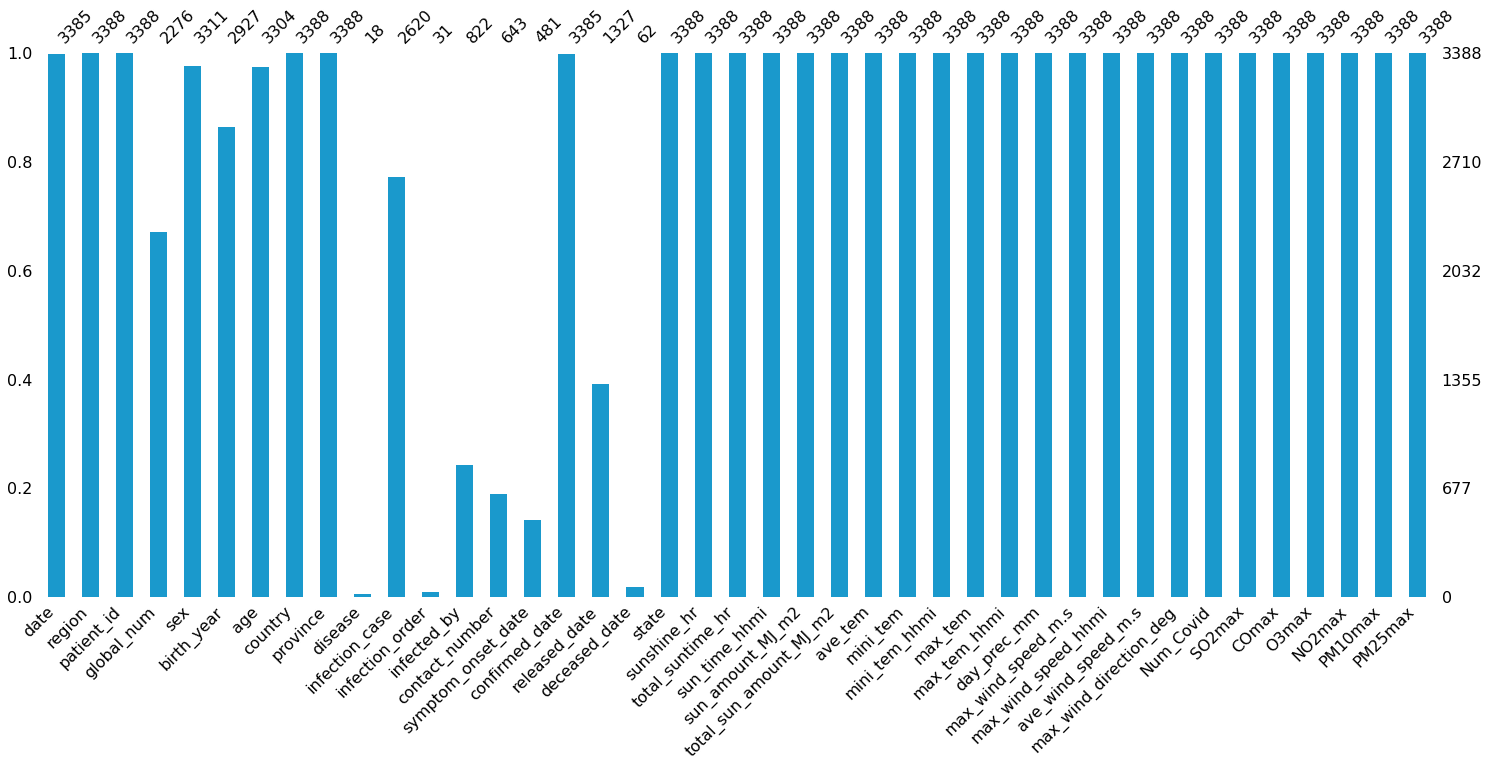

In [20]:
import missingno as msno
msno.bar(df=patient_df.iloc[:, :], color=(0.1, 0.6, 0.8))

###### <font color=blue>-> 결측값 시각화 </font>
#### <font color=yellow>-> 결측값 80% 이상인 컬럼 5개 확인 </font>

# Data visualization
#### Boxplot을 사용해서 numeric_feature 데이터의 분포를 살펴보기

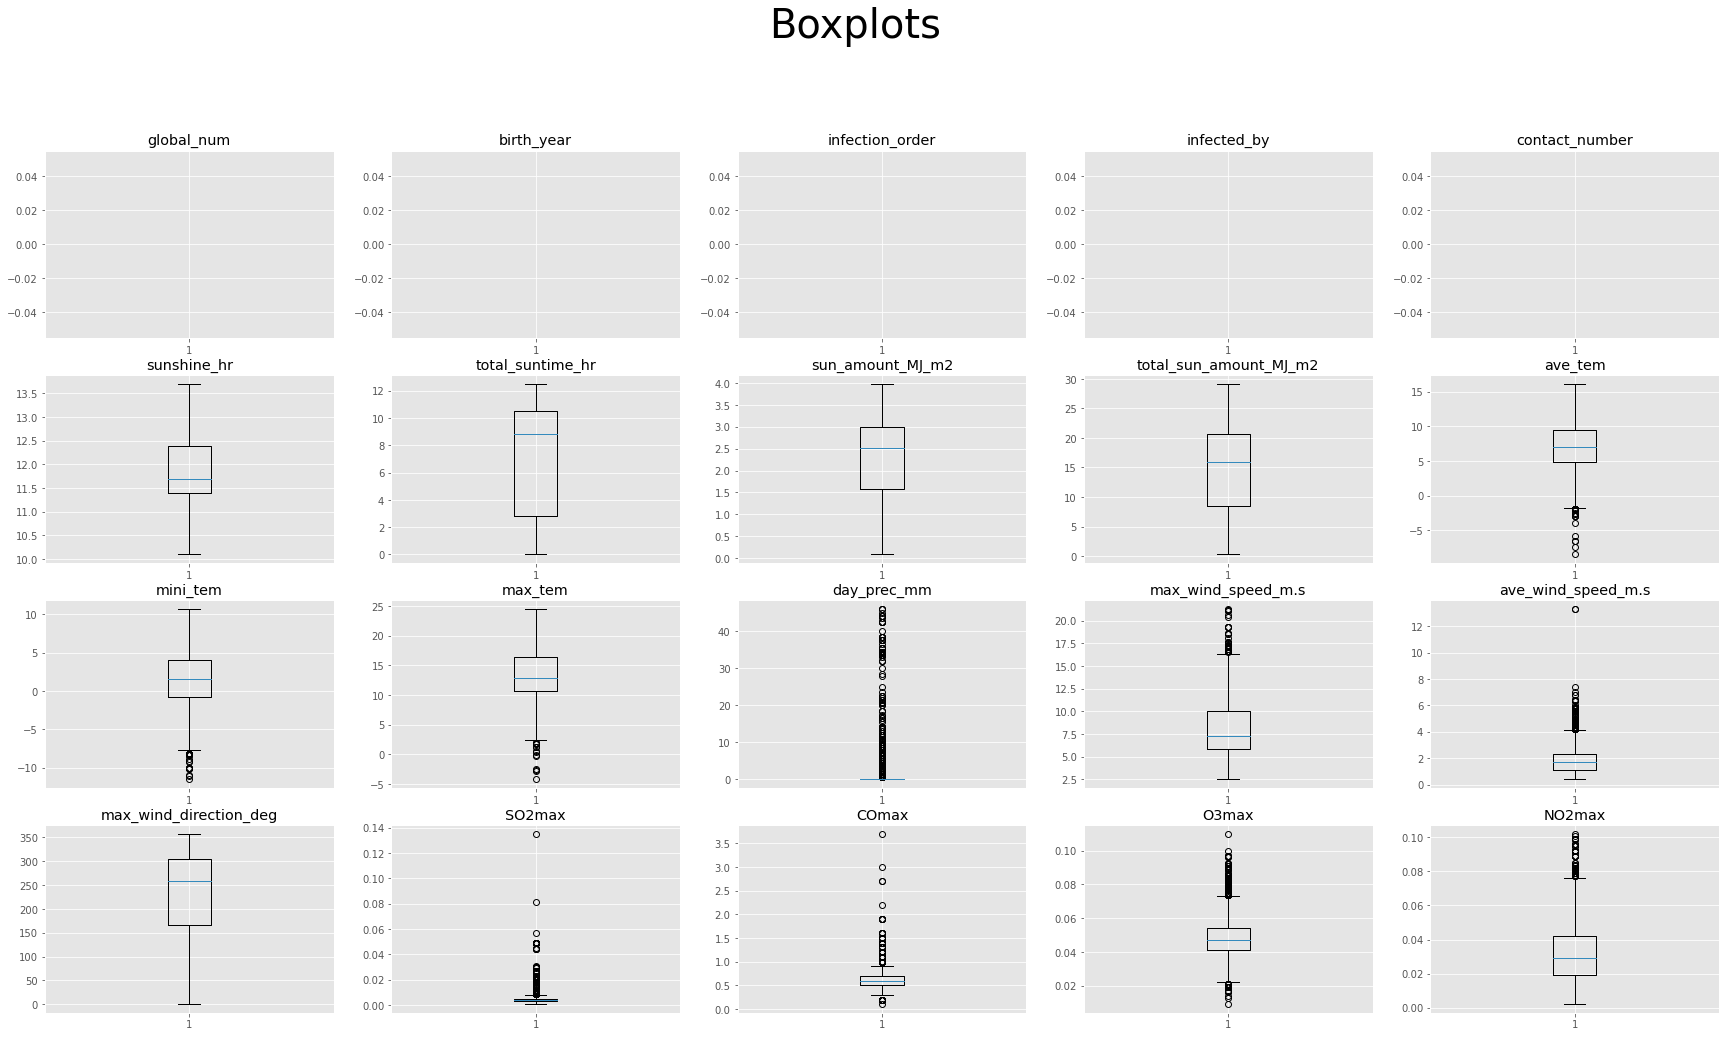

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

plt.figure(figsize=(30,20))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(feature)):
    plt.subplot(5,5,i+1)
    plt.title(feature[i])
    plt.boxplot(patient_df[feature[i]])
plt.show()

#### 히스토그램 을 사용해서 categorical_feature 데이터의 분포를 살펴보기

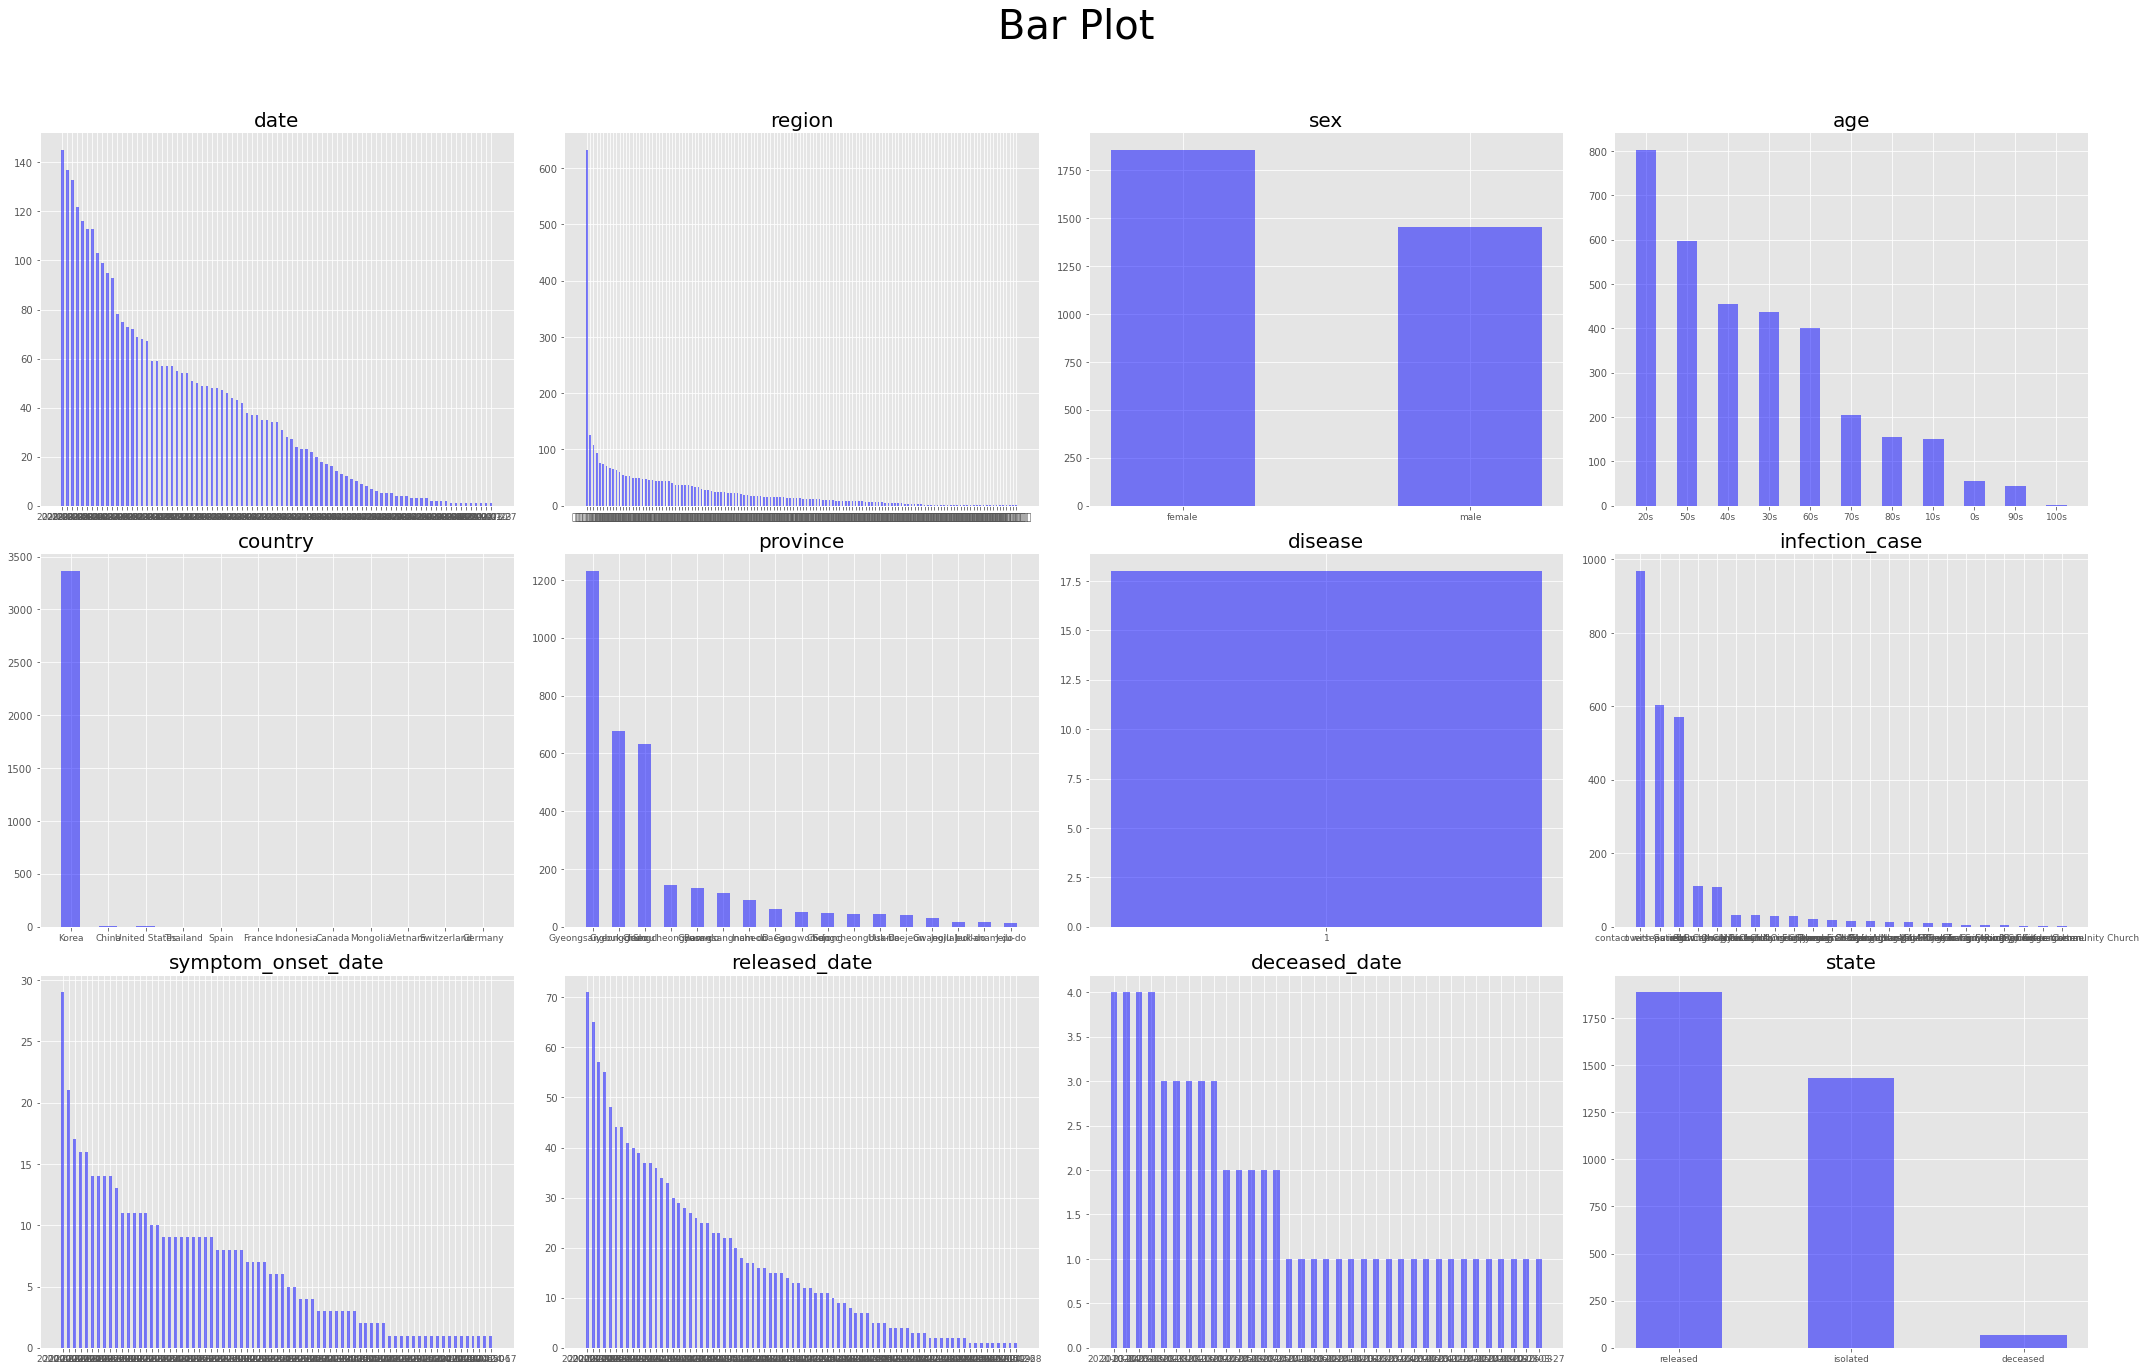

In [24]:
feature = categorical_feature

plt.figure(figsize=(30,20))
plt.suptitle("Bar Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(3,4,i+1)
    plt.title(feature[i], fontsize=20)
    temp = patient_df[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=9)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### <font color=yellow>-> 20대 발생자가 가장 많음</font>
#### <font color=yellow>-> female 이 male 보다 많음</font>

#### 환자별 state 변수

In [25]:
isolate_pct = 100 * patient_df.query('state == "isolated"').shape[0] / patient_df.shape[0]
release_pct = 100 * patient_df.query('state == "released"').shape[0] / patient_df.shape[0]
decease_pct = 100 * patient_df.query('state == "deceased"').shape[0] / patient_df.shape[0]

print('전체 환자 중 "격리" 환자는', round(isolate_pct,2),'% 입니다')
print('전체 환자 중 "격리 해제" 환자는', round(release_pct,2),'% 입니다')
print('전체 환자 중 "사망" 환자는', round(decease_pct,2),'% 입니다')

전체 환자 중 "격리" 환자는 42.3 % 입니다
전체 환자 중 "격리 해제" 환자는 55.67 % 입니다
전체 환자 중 "사망" 환자는 2.04 % 입니다


In [30]:
def pie_chart(data, col, title = ''):
    cnt_df = data[col].value_counts().reset_index()
    fig = px.pie(cnt_df, 
                 values = col, 
                 names = 'index', 
                 title = title, 
                 template = 'seaborn',
                 color_discrete_sequence=px.colors.sequential.RdBu)
    fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
    fig.show()

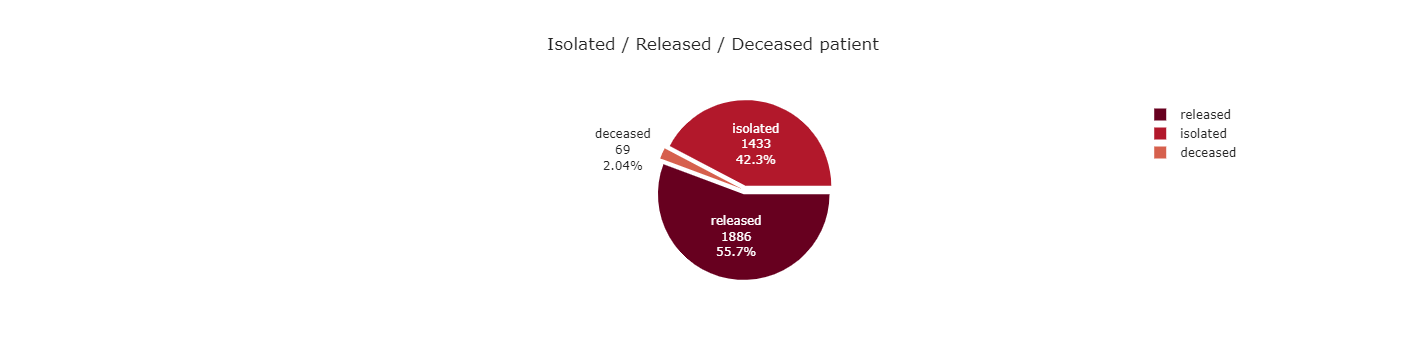

In [33]:
pie_chart(patient_df, 'state', title = 'Isolated / Released / Deceased patient')

##### <font color=yellow>-> 전체 환자 중 "격리" 환자는 42.3 % 입니다</font>
##### <font color=yellow>-> 전체 환자 중 "격리 해제" 환자는 55.67 % 입니다</font>.
##### <font color=yellow>-> 전체 환자 중 "사망" 환자는 2.04 % 입니다</font>

In [28]:
patient_df['age_2020'] = 2021 - patient_df['birth_year'] + 1

release = patient_df.query('state == "released"')
isolate = patient_df.query('state == "isolated"')
decease = patient_df.query('state == "deceased"')

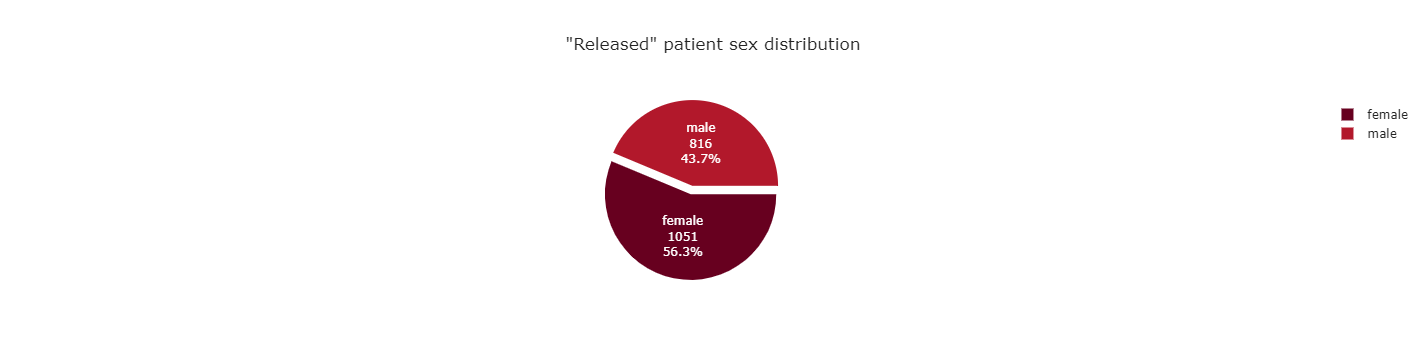

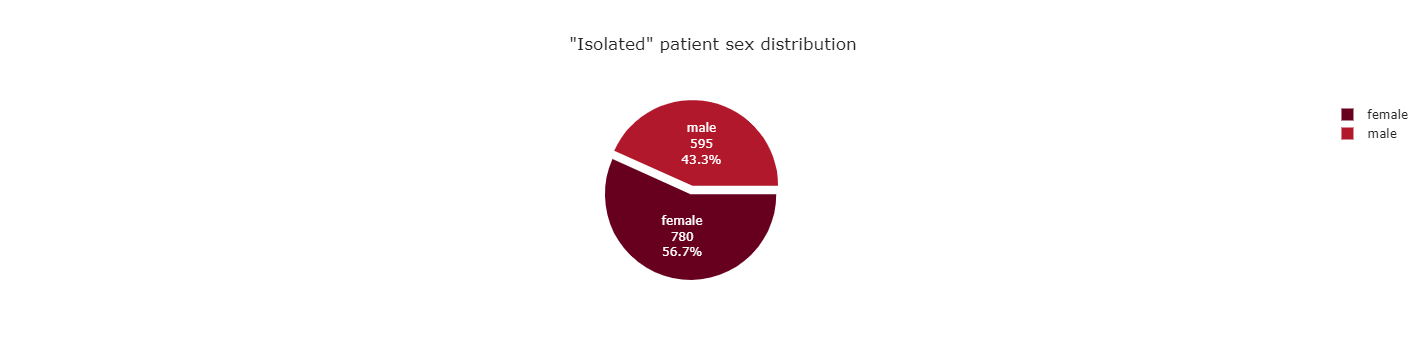

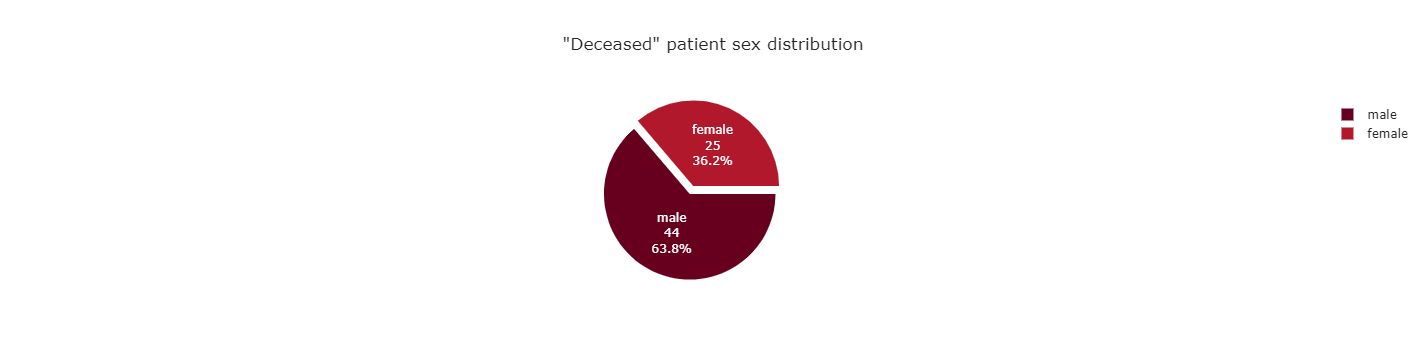

In [29]:
pie_chart(data = release, col = 'sex', title = '"Released" patient sex distribution')
pie_chart(data = isolate, col = 'sex', title = '"Isolated" patient sex distribution')
pie_chart(data = decease, col = 'sex', title = '"Deceased" patient sex distribution')

#### <font color=yellow>-> 사망자는 여자보다 남자가 많음</font>

#### 발병은 20대에서 제일 높은데 사망률은?

In [30]:
age_list = 2021 - patient_df['birth_year']
patient_df.insert(3, "Age", age_list)
patient_df
# 현재년도 2021에서 출생일을 빼서 현재 나이 계산

,date,region,patient_id,Age,global_num,sex,birth_year,age,country,province,...,ave_wind_speed_m.s,max_wind_direction_deg,Num_Covid,SO2max,COmax,O3max,NO2max,PM10max,PM25max,age_2020
0,2020-01-23,서울_강서구,1000000001,57.0,2.0,male,1964.0,50s,Korea,Seoul,...,1.8,0.0,0,0.014,1.2,0.049,0.059,88,49,58.0
1,2020-01-30,서울_중랑구,1000000002,34.0,5.0,male,1987.0,30s,Korea,Seoul,...,1.6,340.3,1,0.003,0.7,0.026,0.044,27,10,35.0
2,2020-01-30,서울_종로구,1000000003,57.0,6.0,male,1964.0,50s,Korea,Seoul,...,0.5,354.4,0,0.003,0.8,0.037,0.040,26,13,58.0
3,2020-01-30,서울_마포구,1000000004,30.0,7.0,male,1991.0,20s,Korea,Seoul,...,2.0,320.6,1,0.004,0.5,0.028,0.059,35,21,31.0
4,2020-01-31,서울_성북구,1000000005,29.0,9.0,female,1992.0,20s,Korea,Seoul,...,1.4,225.0,0,0.003,1.1,0.027,0.053,67,40,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,2020-03-29,제주_제주시,7000000009,NaN,9651.0,female,NaN,20s,Korea,Jeju-do,...,3.1,326.3,0,0.002,0.5,0.045,0.039,55,21,NaN
3384,2020-04-03,제주_제주시,7000000010,NaN,NaN,female,NaN,20s,Korea,Jeju-do,...,1.9,298.1,2,0.003,0.6,0.066,0.032,80,39,NaN
3385,2020-04-03,제주_제주시,7000000011,NaN,NaN,male,NaN,30s,Korea,Jeju-do,...,1.9,298.1,2,0.003,0.6,0.066,0.032,80,39,NaN
3386,2020-04-03,제주_제주시,7000000012,NaN,NaN,female,NaN,20s,Korea,Jeju-do,...,1.9,298.1,2,0.003,0.6,0.066,0.032,80,39,NaN


In [31]:
# patient_df['Age'].notnull()
# patient_df.isnull().sum()

In [32]:
age_state_df = patient_df.filter(['Age','state']).dropna()
age_state_df = pd.get_dummies(age_state_df)
age_state_df

,Age,state_deceased,state_isolated,state_released
0,57.0,0,0,1
1,34.0,0,0,1
2,57.0,0,0,1
3,30.0,0,0,1
4,29.0,0,0,1
...,...,...,...,...
3375,23.0,0,0,1
3376,23.0,0,0,1
3377,49.0,0,0,1
3378,47.0,0,0,1


In [33]:
age_list = age_state_df['Age'].unique()

In [34]:
state_deceased_list, state_isolated_list, state_released_list = [],[],[]

for age in age_list:
    state_deceased_list_i = age_state_df[age_state_df['Age']== age]['state_deceased'].sum()
    state_deceased_list.append(state_deceased_list_i)
    
    state_isolated_list_i = age_state_df[age_state_df['Age']== age]['state_isolated'].sum()
    state_isolated_list.append(state_isolated_list_i)
    
    state_released_list_i = age_state_df[age_state_df['Age']== age]['state_released'].sum()
    state_released_list.append(state_released_list_i)

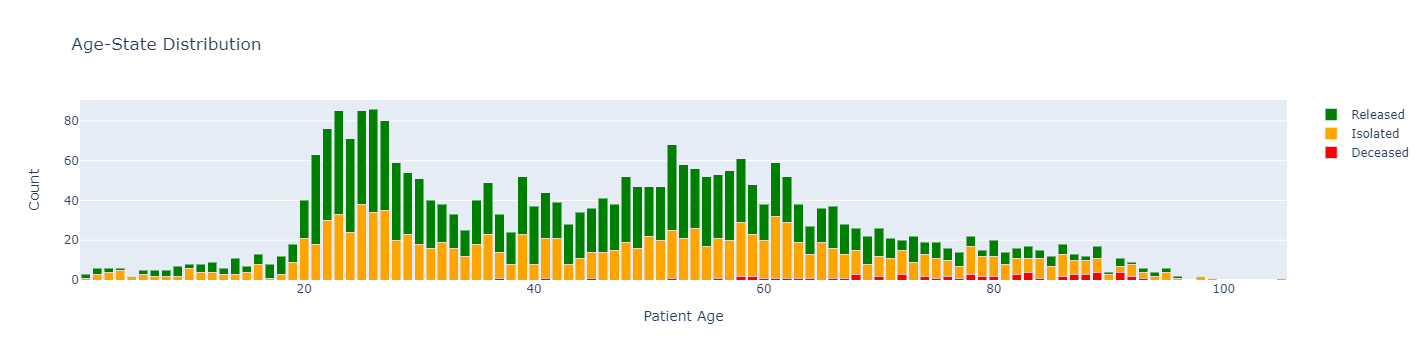

In [35]:
fig = go.Figure(data=[
    go.Bar(name='Deceased', x=age_list, y=state_deceased_list, marker_color='red'),
    go.Bar(name='Isolated', x=age_list, y=state_isolated_list, marker_color='orange'),
    go.Bar(name='Released', x=age_list, y=state_released_list, marker_color='green'),
])
# stack 모드로 barmode 바꿈
fig.update_layout(barmode='stack', title='Age-State Distribution', xaxis_title='Patient Age', yaxis_title='Count')
fig.show()

#### <font color=yellow>->사망자 대부분은 50대 이상인것 확인</font>
##### <font color=blue>->20대 확진자가 많은 이유?</font>

In [72]:
inf_case = patient_df.infection_case.unique()
for i in range(len(inf_case)) :
    globals()['case'+ str(i)] = patient_df[patient_df.infection_case == inf_case[i]]
    globals()['case'+str(i)] = pd.DataFrame(globals()['case'+ str(i)].groupby('confirmed_date').count().cumsum().patient_id).reset_index()
    globals()['case'+str(i)].columns = ['confirmed_date','case'+str(i)]  
merged = case0

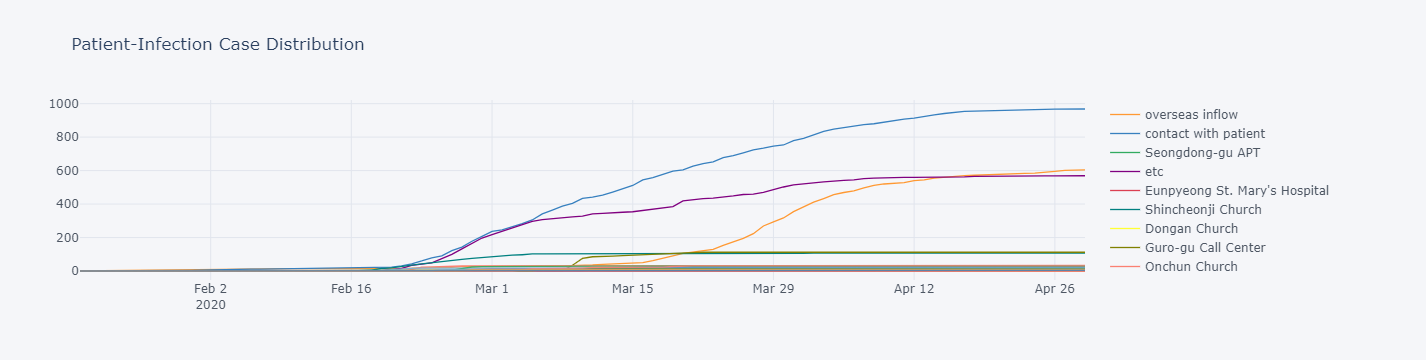

In [73]:
for i in [x for x in range(len(inf_case)) if x != 0] :
    merged = pd.merge(merged , globals()['case'+str(i)],how= 'outer',on='confirmed_date')
merged = merged.sort_values(by = 'confirmed_date').reset_index()
merged = merged.drop('index',axis=1)
merged.columns = np.insert(inf_case,0,'confirmed_date')
merged = merged.fillna(method='pad')
merged = merged.fillna(0)
merged = merged.set_index('confirmed_date')
fig = merged.iplot(asFigure=True, kind='scatter')
fig.update_layout(title='Patient-Infection Case Distribution')
fig.show()

#### <font color=yellow>->접촉에 의한 감염이 가장 많았고 해외 확진자 유입이 3월부터 생기면서 같이 상승함을 확인</font>

#### 변수별 상관관계 알아보기 
##### 데이터 특성마다 상이한 Scaling 수행. (Sklearn 이용)
##### 범주형-> Label encoding (One hot encoding), 숫자형-> Scaling

### 20대 감염 케이스 확인해보기

In [108]:
patient_df['infection_case'] = patient_df['infection_case'].astype(str).apply(lambda x : x.split()[0])
infectionCase = patient_df.pivot_table(index='infection_case',columns='age',
                                        values='patient_id', aggfunc='count')

patientTotal = infectionCase.fillna(0).sum(axis=1)
patientTotal = patientTotal.sort_values(ascending=False)[:5]

patient20s = infectionCase['20s'].dropna()
patient20sTop = patient20s.sort_values(ascending=False)[:5]

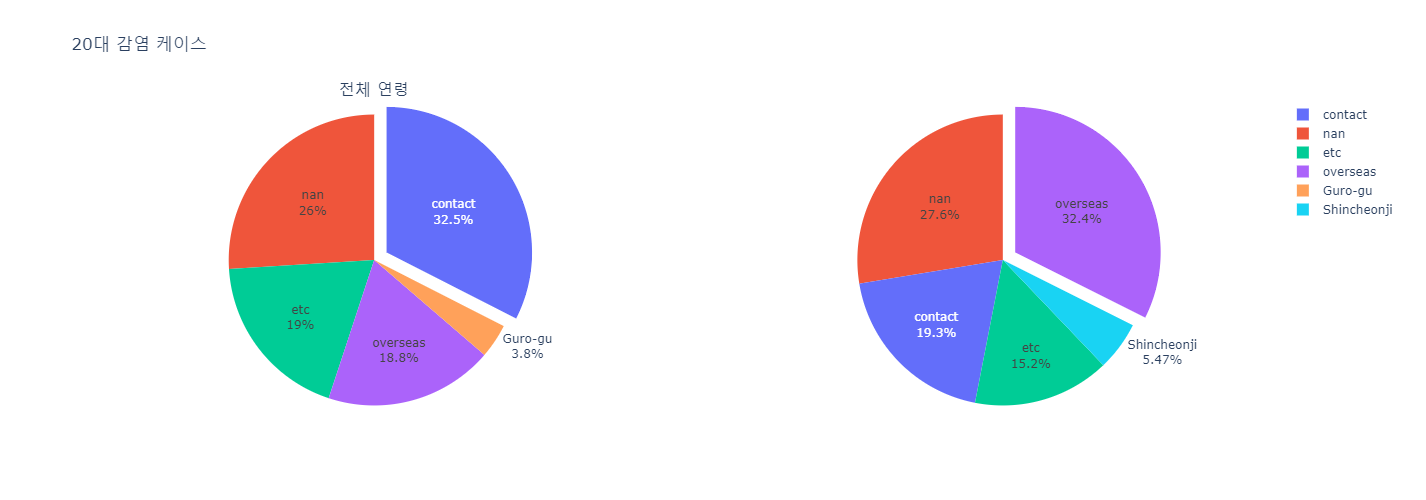

In [120]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=['전체 연령'])

fig.add_trace(go.Pie(values=patientTotal.values, labels=patientTotal.index, 
                    name='>', pull=[.1,0]),row=1,col=1)
fig.add_trace(go.Pie(values=patient20sTop.values, labels=patient20sTop.index, 
                    name='>', pull=[.1,0]),row=1,col=2,)

fig.update_traces(textinfo="percent+label")
fig.update_layout(title='20대 감염 케이스', showlegend=True,
                 height=500)
fig.show()

#### <font color=yellow>->해외에서 유입되는 20대들이 (32.4%) 많은것을 확인 할 수있다.</font>

In [38]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환
from sklearn.preprocessing import LabelEncoder

corr_df = patient_df.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

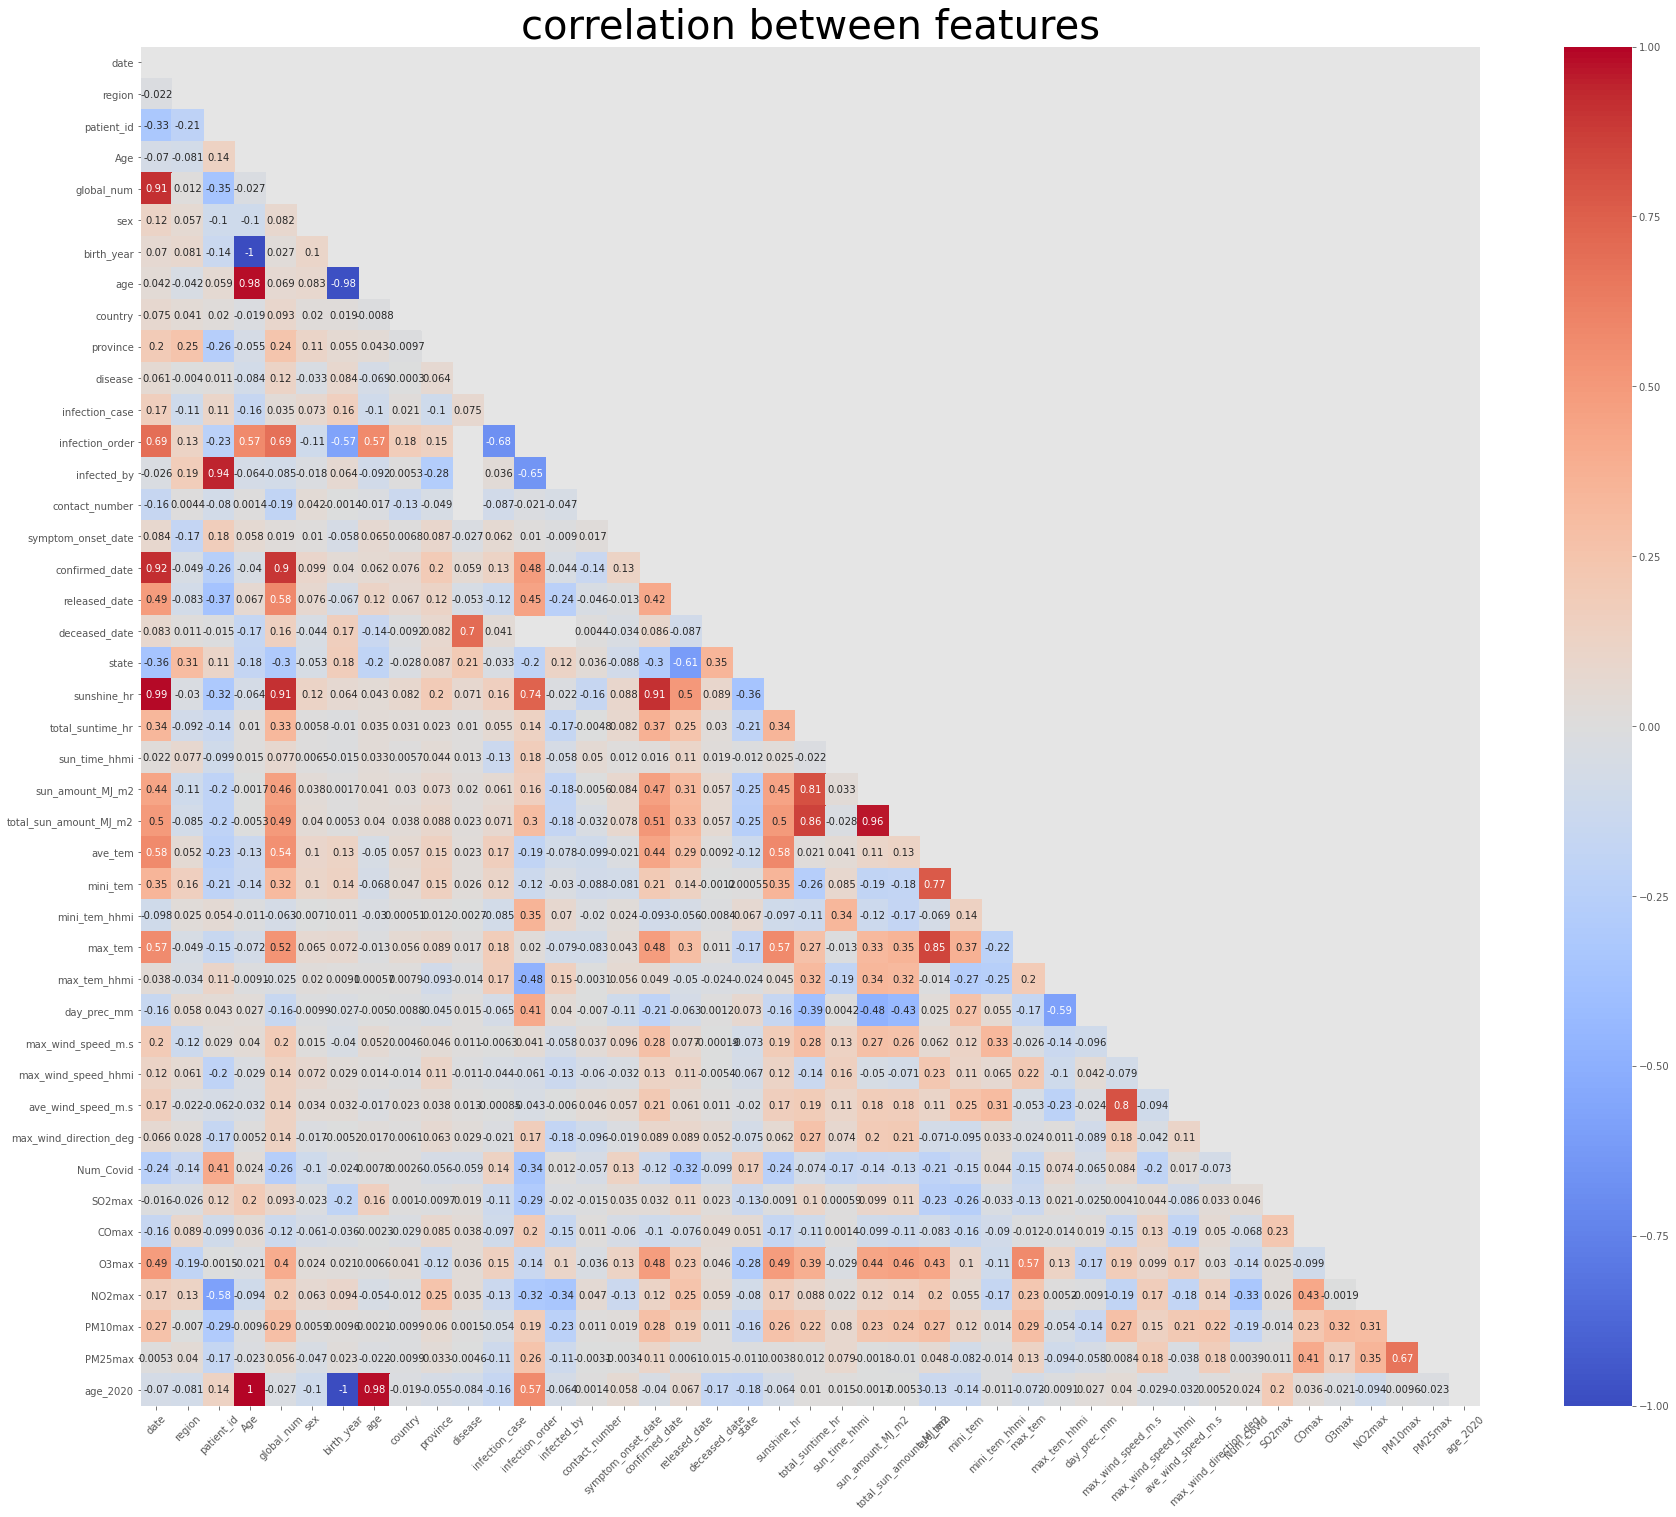

In [39]:
#상관관계 분석도
import seaborn as sns

plt.figure(figsize=(30,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=10, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=10)
plt.title('correlation between features', fontsize=40)
plt.show()

In [40]:
# patient_df_corr = patient_df.corr()
# patient_df_corr

# patient_df_corr.sort_values(by = ['PM10max'],
#                            axis = 0,
#                            ascending = False,
#                            inplace = False,
#                            kind = 'quicksort')
#correlation 따로 뽑아보기

### Target과 다른 numeric_feature 들과의 관계 확인 하기
#### 수치형 feature를 시각화하기 위해 scatter plot을 이용

In [41]:
target = "PM10max"

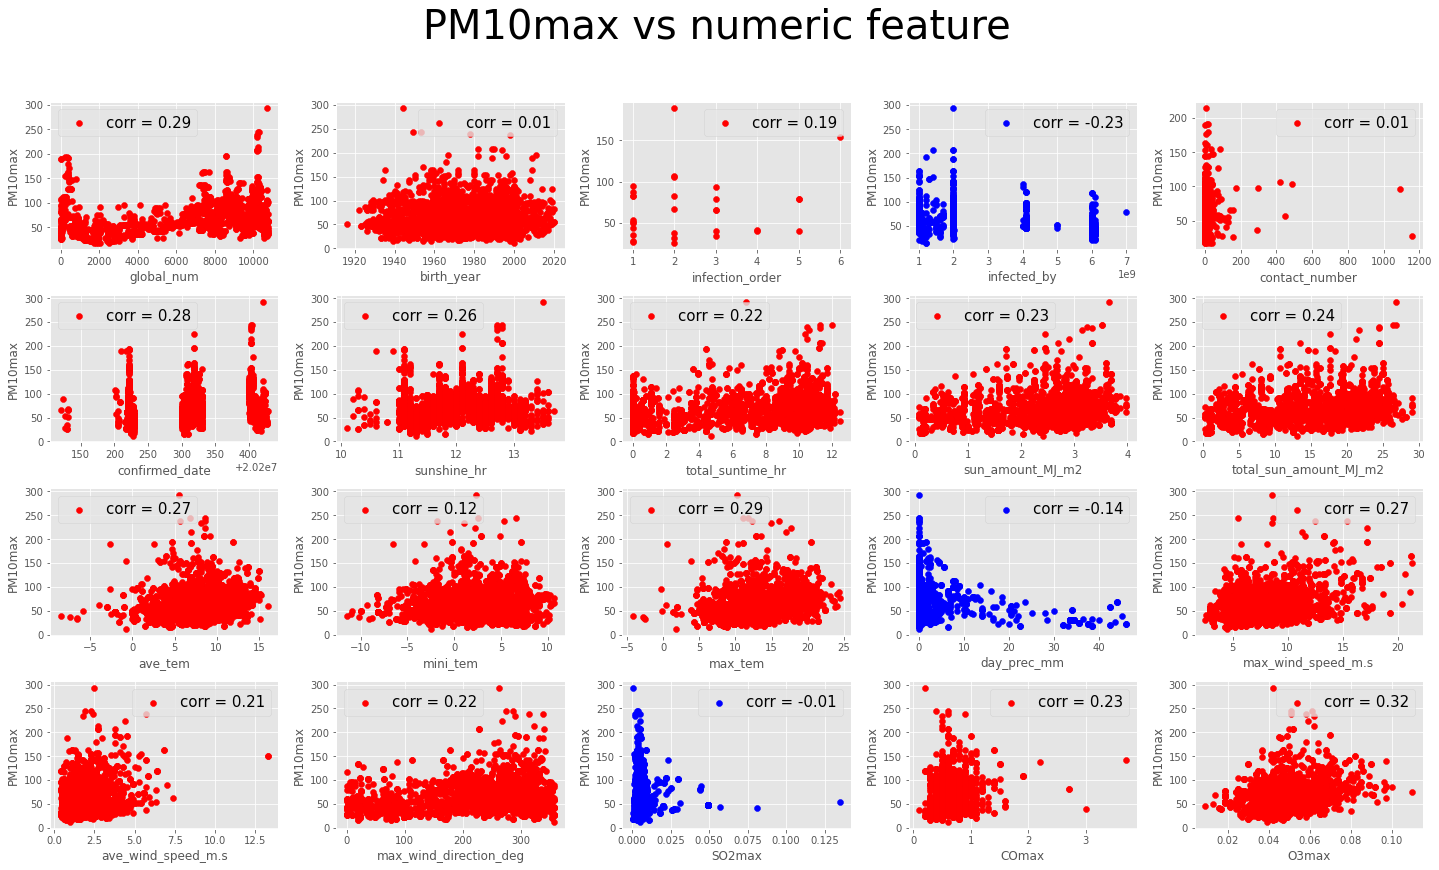

In [42]:
feature = numeric_feature

plt.figure(figsize=(20,15))
plt.suptitle("PM10max vs numeric feature", fontsize=40)

# id는 제외
for i in range(len(feature[:-1])):
    plt.subplot(5,5,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = patient_df[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(patient_df[feature[i]], patient_df[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Target과 categorical_feature 의 관계
#### 카테고리에 따른 Target feature의 분포를 살펴보기 위해 violin 그래프 사용

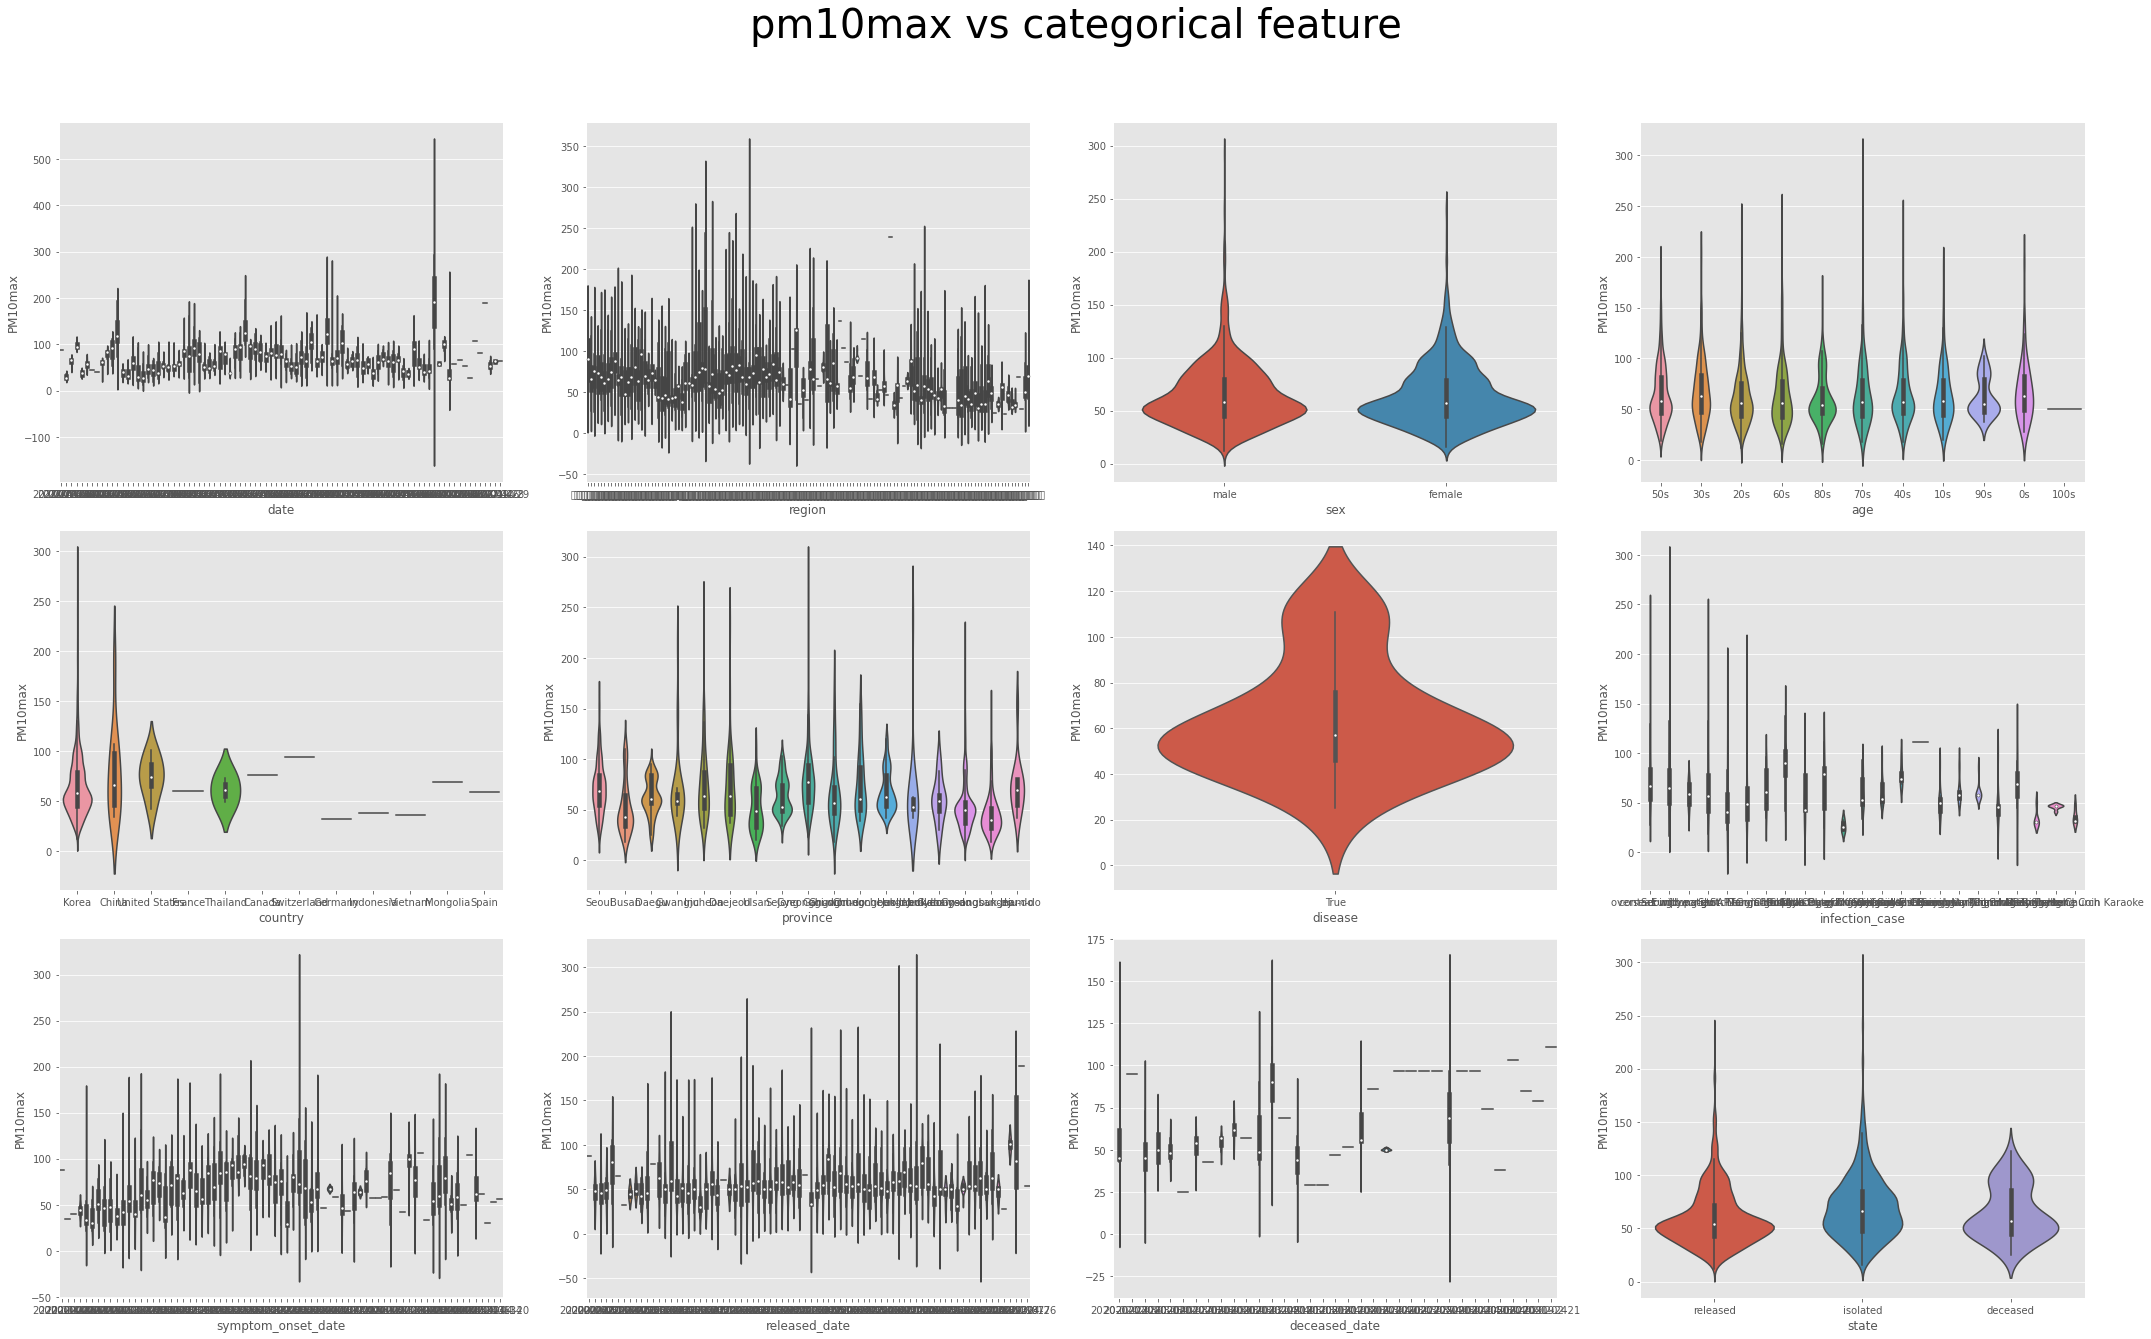

In [43]:
feature = categorical_feature

plt.figure(figsize=(30,25))
plt.suptitle("pm10max vs categorical feature", fontsize=40)

# id는 제외
for i in range(len(feature)):
    plt.subplot(4,4,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    sns.violinplot(x= patient_df[feature[i]], y= patient_df[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### <font color=yellow>->pm10max vs 사망률 </font>
##### <font color=yellow>->카테고리에 따라 target feature pm10max 가 어느 정도 차이를 보이는지 알 수 있다 </font>

# Data visualization by columns(2)

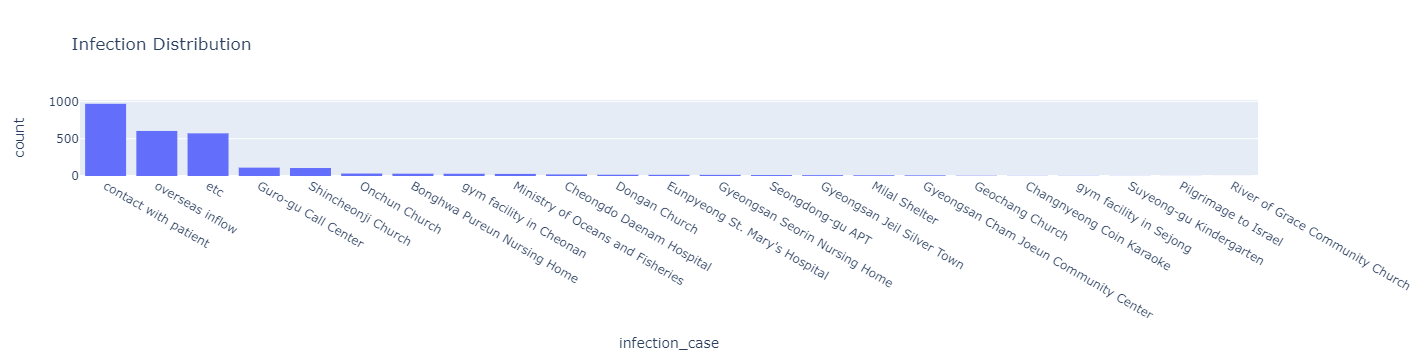

In [58]:
fig = px.histogram(patient_df, x="infection_case", title='Infection Distribution'). update_xaxes(categoryorder = 'total descending')
fig.show()

##### <font color=yellow>->그룹별로 condense하기 ex) church, gym, hospital to one group </font>

In [45]:
# patient_state_no_null_df = patient_df['state'].dropna()

# fig = px.pie(patient_state_no_null_df, names='state', title='Patient State Distribution')
# fig.show()

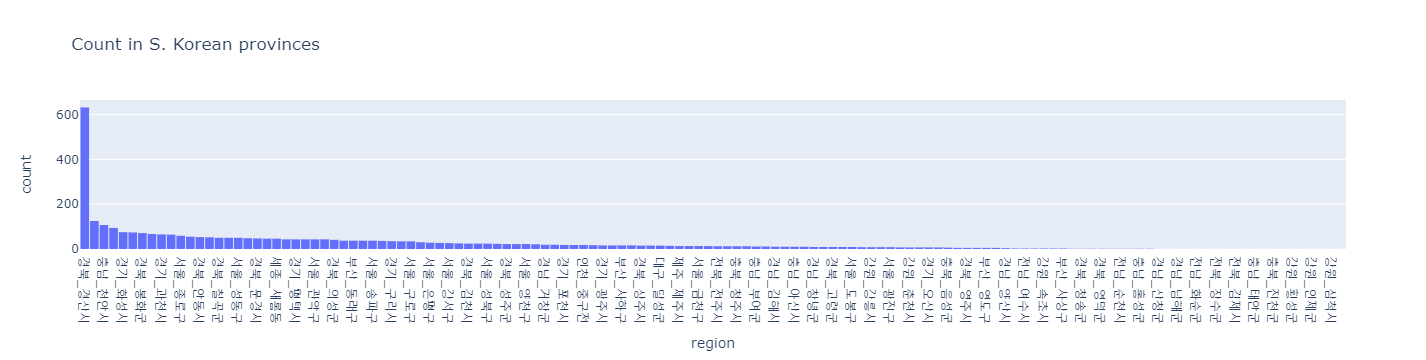

In [46]:
fig = px.histogram(patient_df, x="region", title='Count in S. Korean provinces', nbins=60).update_xaxes(categoryorder = 'total descending')
fig.update_layout(
    bargap=0.1)
fig.show()

##### <font color=yellow>->지역별로 환자수(격리자, 격리해제, 사망자) 보았을때 경산시가 가장 많았다.  </font>

In [53]:
patient_df_date_group = patient_df.groupby('date')

In [54]:
patient_df_date_group['date'].count()

date
2020-01-20    1
2020-01-23    1
2020-01-26    1
2020-01-27    1
2020-01-30    3
             ..
2020-04-25    8
2020-04-26    4
2020-04-27    7
2020-04-28    3
2020-04-29    1
Name: date, Length: 87, dtype: int64

In [55]:
confirmed_case_cumsum = list(patient_df_date_group['date'].count().cumsum())

In [56]:
date_list = list(patient_df['date'].dropna().unique())

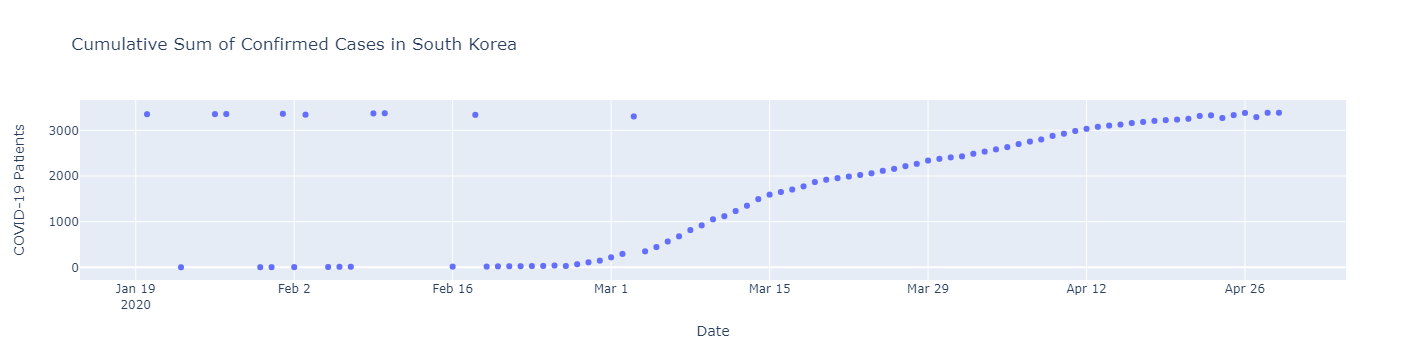

In [57]:
fig = go.Figure(data=go.Scatter(x=date_list, y=confirmed_case_cumsum, mode='markers'))
fig.update_layout(xaxis_title='Date', yaxis_title='COVID-19 Patients', title="Cumulative Sum of Confirmed Cases in South Korea")
fig.show()

# 이상치 분석
### outliers +/- 3 standard deviations outside of mean

In [7]:
def get_outliers(patient_df):
    
    outs = {}
    
    patient_df = patient_df.select_dtypes(include=['int64'])

    
    for col in patient_df.columns:
        
        # calculate summary statistics
        data_mean, data_std = np.mean(patient_df[col]), np.std(patient_df[col])
        
        # identify outliers
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off
        
        # identify outliers
        outliers = [x for x in patient_df[col] if x < lower or x > upper]
        
        outs[col] = len(outliers)
        
    return outs

In [8]:
get_outliers(patient_df)

{'patient_id': 0,
 'sun_time_hhmi': 53,
 'mini_tem_hhmi': 0,
 'max_tem_hhmi': 189,
 'max_wind_speed_hhmi': 0,
 'Num_Covid': 123,
 'PM10max': 46,
 'PM25max': 27}

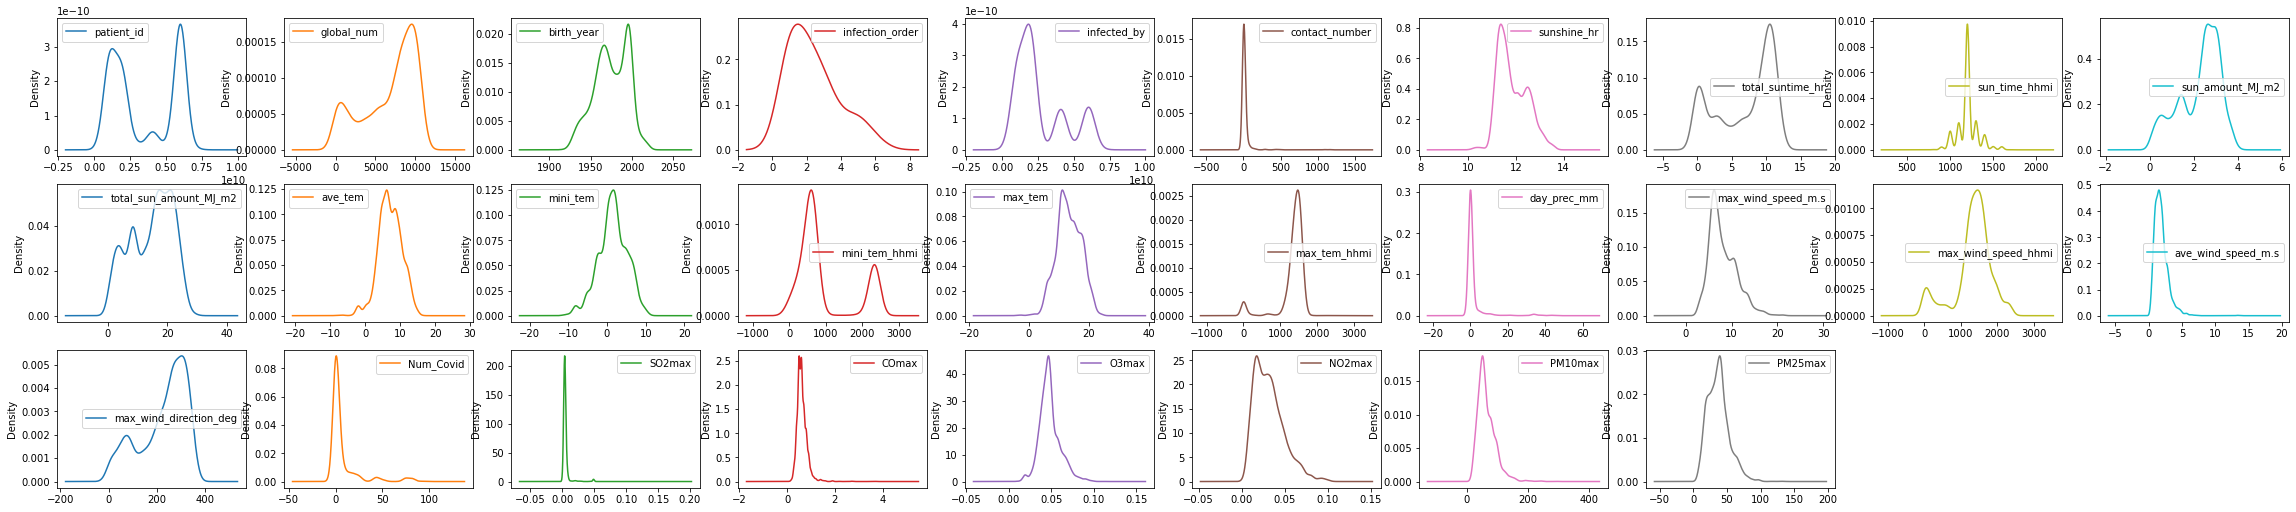

In [11]:
patient_df.plot(figsize=(40,30), kind='density', subplots=True, layout=(10,10), sharex=False);

In [13]:
def statistical_information(patient_df):
    return patient_df.describe().round(2).T.style.bar(subset=['mean'], color='cornflowerblue')\
                                .background_gradient(subset=['std'], cmap='Reds')\
                                .background_gradient(subset=['50%'], cmap='coolwarm') 
statistical_information(patient_df)

,count,mean,std,min,25%,50%,75%,max
confirmed_date,3248.000000,20200303.570000,59.070000,20200120.000000,20200229.000000,20200308.000000,20200325.000000,20200429.000000
patient_id,3248.000000,3601881882.520000,2190480407.480000,1000000001.000000,1475000023.750000,3001000006.500000,6001000547.250000,7000000013.000000
global_num,2137.000000,6783.040000,3263.480000,1.000000,4625.000000,7928.000000,9459.000000,10758.000000
birth_year,2812.000000,1975.180000,20.250000,1916.000000,1961.000000,1975.000000,1994.000000,2020.000000
infection_order,29.000000,2.480000,1.450000,1.000000,1.000000,2.000000,3.000000,6.000000
infected_by,808.000000,2694491493.490000,1743859962.990000,1000000002.000000,1300000003.000000,2000000205.000000,4100000008.000000,7000000009.000000
contact_number,625.000000,15.880000,56.070000,0.000000,2.000000,4.000000,13.000000,1091.000000
sunshine_hr,3248.000000,11.860000,0.610000,10.100000,11.400000,11.700000,12.300000,13.700000
total_suntime_hr,3248.000000,6.870000,4.210000,0.000000,2.800000,8.850000,10.520000,12.500000
sun_time_hhmi,3248.000000,1204.000000,115.140000,800.000000,1200.000000,1200.000000,1200.000000,1700.000000
